<a href="https://colab.research.google.com/github/akhiluthappa1/data_science/blob/main/Akhil_uthappa_KMeans_Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics


In [3]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df=pd.read_csv('/content/AAPL_weekly_return_volatility (1) - AAPL_weekly_return_volatility (1).csv')
s=df[df['Year']>2019]
df_1=pd.read_csv('/content/AAPL_weekly_return_detailed (1).csv')
df_1=df_1[df_1['Year']>2019]

In [13]:
dfmerged=df_1.groupby(['Year','Week_Number']).agg({'Open':'first','Adj Close':'last'})
df2=s.merge(dfmerged,on=['Year','Week_Number'],how='inner')
df2

,Year,Week_Number,mean_return,volatility,labels,Open,Adj Close
0,2020,0,-0.48600,0.687308,Red,74.059998,72.967216
1,2020,1,0.85720,1.040851,Green,73.447502,76.131905
2,2020,2,0.54340,1.404286,Green,77.910004,78.192635
3,2020,3,-0.03175,0.547226,Red,79.297501,78.089607
4,2020,4,-0.51960,3.137070,Red,77.514999,75.930748
...,...,...,...,...,...,...,...
100,2021,48,0.64780,1.904606,Green,159.369995,161.173050
101,2021,49,2.09540,1.445607,Green,164.289993,178.710495
102,2021,50,-0.91880,2.482887,Red,181.119995,170.434723
103,2021,51,0.74825,1.230668,Green,168.279999,175.553543


In [14]:
df2[['mean_return','volatility']].describe()

,mean_return,volatility
count,105.000000,105.000000
mean,0.199188,1.977859
std,0.939050,1.384040
min,-3.606200,0.358251
25%,-0.311000,1.209716
50%,0.158200,1.528752
75%,0.724200,2.382896
max,2.864600,9.574478


In [16]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df2['labels']= label_encoder.fit_transform(df2['labels'])

df2['labels'].unique()

array([1, 0])

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

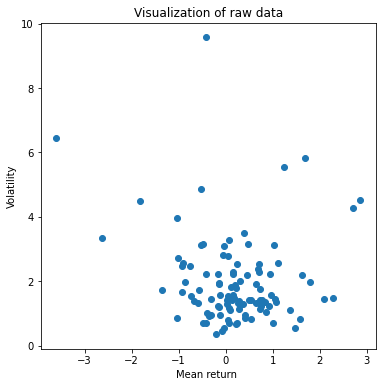

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(df2.iloc[:,2], df2.iloc[:,3])
plt.xlabel('Mean return ')
plt.ylabel('Volatility')
plt.title('Visualization of raw data');

In [19]:
X=df2.iloc[:,2:4]


#### Q1

In [20]:
K = range(1, 9)
distortions = []
mapping1 = {} 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
   

In [21]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.2615565326035558
2 : 1.0093573809950749
3 : 0.8703440083415113
4 : 0.8068806306750612
5 : 0.6845480183149993
6 : 0.6116754240889737
7 : 0.5570981612449375
8 : 0.5173508299841331


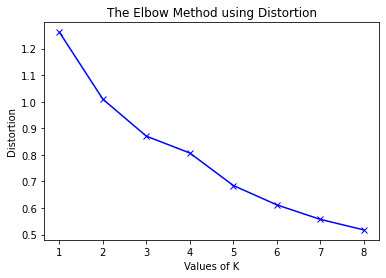

In [22]:
plt.plot(K, distortions,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

#### Q2

In [24]:
X = StandardScaler().fit_transform(X)

model = KMeans(n_clusters = 5)
model.fit(X)

KMeans(n_clusters=5)

In [25]:
identified_clusters = model.fit_predict(X)
identified_clusters

array([0, 1, 1, 0, 4, 1, 0, 4, 4, 3, 2, 2, 3, 4, 3, 1, 4, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 4, 3, 1, 1, 1, 0, 4, 4, 4, 1, 0, 1, 4, 0, 4,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 4, 0, 1, 4, 1, 0, 0, 4, 4, 4, 0, 0, 0,
       1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 1, 0], dtype=int32)

Text(0.5, 1.0, 'Visualization of clusters')

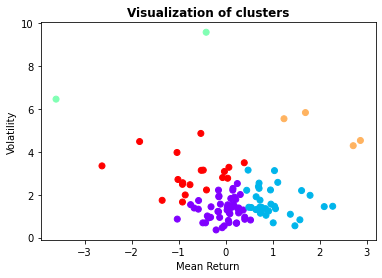

In [26]:
from matplotlib import colors

data_with_clusters = df2.iloc[:,2:4].copy()
data_with_clusters['Clusters'] = identified_clusters 
cmap = colors.ListedColormap(['red', 'green'])
plt.scatter(data_with_clusters['mean_return'],
            data_with_clusters['volatility'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Mean Return')
plt.ylabel('Volatility')
plt.title('Visualization of clusters', fontweight='bold')


In [28]:
data_with_clusters['labels']=df2['labels']

In [29]:

from collections import defaultdict
from collections import Counter

def computePercent(dataframe):
    dic=defaultdict(list)
    s=np.unique(dataframe['Clusters'])

    l=len(dataframe)
    for i in range(l):
        s=dataframe.iloc[i,2]
        p=dataframe.iloc[i,3]
        dic[s].append(p)
        
        
    for d in dic:
        a=dic[d]
        counts=Counter(a)
        zeroes=counts[0]
        ones=counts[1]
        print("the % of zerores in cluseter:",d," are ",(zeroes/len(a)*100)," and % of ones are ",
                                                          (ones/len(a)*100))
        

In [30]:
computePercent(data_with_clusters)

the % of zerores in cluseter: 0  are  31.25  and % of ones are  68.75
the % of zerores in cluseter: 1  are  93.75  and % of ones are  6.25
the % of zerores in cluseter: 4  are  15.789473684210526  and % of ones are  84.21052631578947
the % of zerores in cluseter: 3  are  100.0  and % of ones are  0.0
the % of zerores in cluseter: 2  are  0.0  and % of ones are  100.0
